## Sentiment Analysis on a News Article

### Importing Necessary Libraries

In [23]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import sys
import os
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
from textblob import TextBlob
from pattern.en import sentiment



### Selecting a News Article to Analyze

In [2]:
r=requests.get('https://www.npr.org/sections/goatsandsoda/2022/09/12/1121599445/so-you-havent-caught-covid-yet-does-that-mean-youre-a-superdodger')

In [3]:
# Setting the correct text encoding of the HTML page. This is the most common character encoding on the web.
r.encoding = 'utf-8'

In [4]:
# Extracting the HTML from the request object
html = r.text

In [5]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

In [6]:
# Getting the text out of the soup
text = soup.get_text()

In [7]:
# Cleaning the text
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "\'"])
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence
textblob_sentiment=[]

### Creating Polarity and Subjectivity Charts

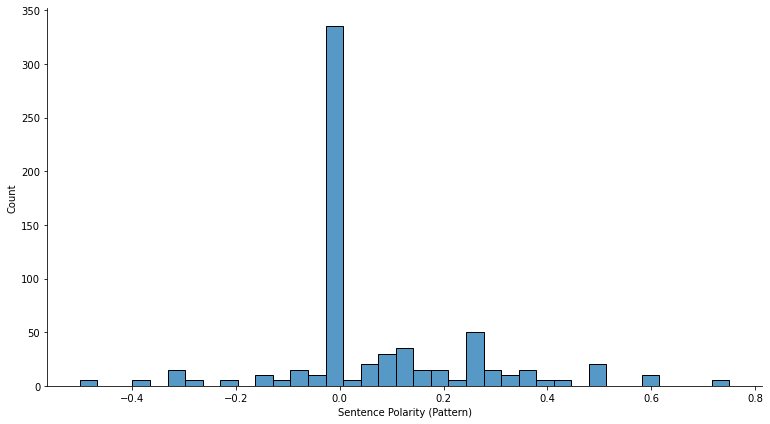

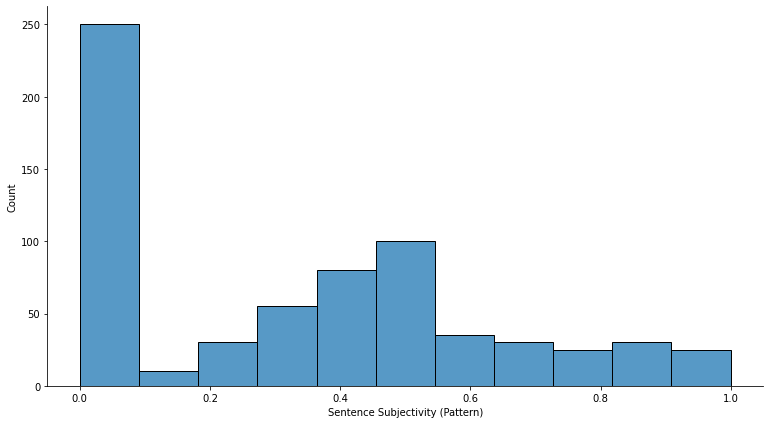

In [27]:
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])
us_df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])
pattern_sentiment[1]
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
sns.displot(df_pattern["Polarity"], height= 6, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")
sns.displot(df_pattern["Subjectivity"], height= 6, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")
# Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
# Tokenizing the text
tokens = tokenizer.tokenize(clean_text)
words = []


In [28]:
# Looping through tokens and making them lowercase
for word in tokens:
    words.append(word.lower())

### Evaluating and Adding to the Stop Word List

In [46]:
# Taking a look at the english stop word list
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
# Remove stopwords (unimportant words such as 'the', 'and', 'is')
stopwords = nltk.corpus.stopwords.words('english')
words_new = []

AttributeError: 'list' object has no attribute 'head'

In [37]:
# Adding stopwords to the predefined list
stopwords.extend(["getty", "images", "npr"])

### Creating a Word Count Chart and Word Cloud

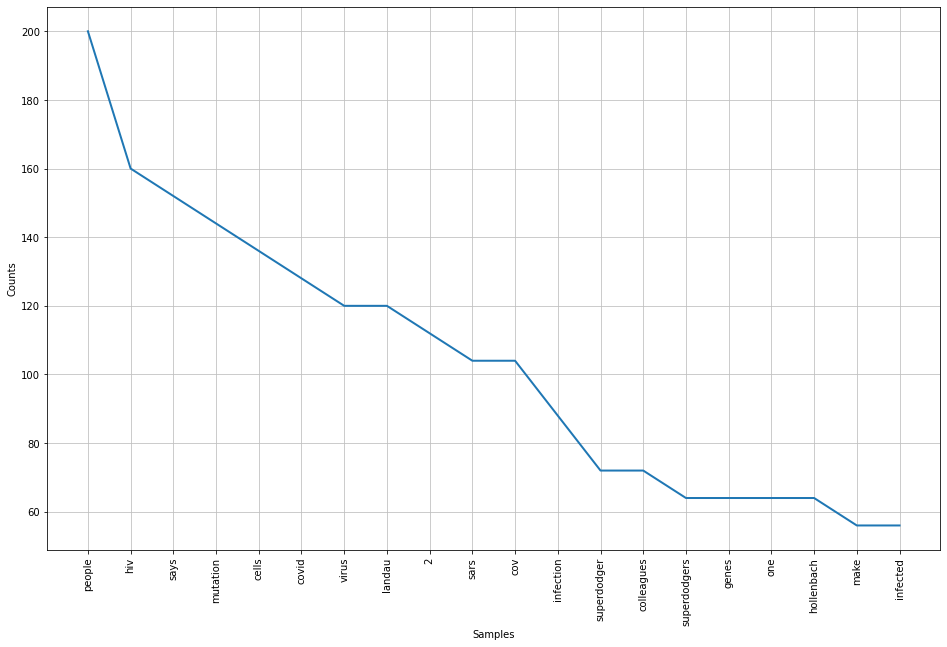

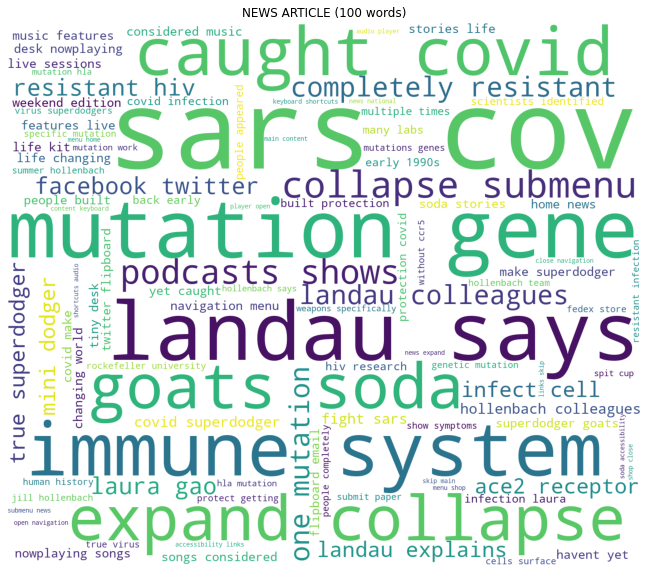

In [41]:
# Appending to words_new all words that are in words but not in stop words
for word in words:
    if word not in stopwords:
        words_new.append(word)
len(words_new)
# Frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)
# Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)
# Converting into string
res=' '.join([i for i in words_new if not i.isdigit()])
plt.subplots(figsize=(16,10))
us_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(us_wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

### Creating an Overall Score

In [42]:
us_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
us_scores = us_df_textblob.select_dtypes(include = ['float64']).mean(axis =0)
us_scores = pd.DataFrame(us_scores)
us_scores = us_scores.T
us_scores

,Polarity,Subjectivity
0,0.073739,0.328915
